In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

In [3]:
# Check GPU available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
# Create Model CNN
def get_model():
    classifier = Sequential()

    classifier.add(Conv2D(filters=32, kernel_size=3, input_shape= (128,128,3)))
    classifier.add(MaxPooling2D(pool_size= (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
  
    classifier.add(Conv2D(filters=64, kernel_size=3))
    classifier.add(MaxPooling2D(pool_size= (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))
    
    classifier.add(Conv2D(filters=128, kernel_size=3))
    classifier.add(MaxPooling2D(pool_size= (2, 2)))    
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    classifier.add(Conv2D(filters=64, kernel_size=3))
    classifier.add(MaxPooling2D(pool_size= (2, 2)))
    classifier.add(BatchNormalization())
    classifier.add(Activation('relu'))

    classifier.add(Flatten())

    classifier.add(Dense(units= 128, activation= 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units= 64, activation= 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units= 32, activation= 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units= 16, activation= 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units= 1, activation='sigmoid'))

    classifier.compile(
        optimizer= 'adam',
        loss= 'binary_crossentropy',
        metrics= ['accuracy'])

    return classifier

In [5]:
classifier = get_model()

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0

In [7]:
# Part 2 - Read and pre-preocess images
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    shear_range= 0.2,
    zoom_range= 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [8]:
training_set = train_datagen.flow_from_directory(
    r'D:\Code\Project-ML\Image_Classification\Dataset\train',
    target_size= (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

test_set = test_datagen.flow_from_directory(
    r'D:\Code\Project-ML\Image_Classification\Dataset\test',
    target_size= (128, 128),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8048 images belonging to 2 classes.
Found 1637 images belonging to 2 classes.


In [9]:
# Part 3 - Fit the CNN to the images
callbacks = [ModelCheckpoint(r'D:\Code\Project-ML\Image_Classification\Save_Model_h5\model_checkpoint_CNN.h5', save_best_only= True, save_weights_only=True, mode='auto', verbose=1, monitor='val_loss')]

In [10]:
t0= datetime.now()
print(t0)

2023-04-25 04:17:50.296518


In [11]:
history = classifier.fit(training_set,
                         epochs= 30,
                         validation_data= test_set,
                         callbacks= callbacks
                         )

Epoch 1/30
252/252 [==============================] - ETA: 0s - loss: 0.4712 - accuracy: 0.7797
Epoch 1: val_loss improved from inf to 0.41194, saving model to model_checkpoint_CNN.h5
252/252 [==============================] - 206s 774ms/step - loss: 0.4712 - accuracy: 0.7797 - val_loss: 0.4119 - val_accuracy: 0.7929
Epoch 2/30
252/252 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.8569
Epoch 2: val_loss improved from 0.41194 to 0.21205, saving model to model_checkpoint_CNN.h5
252/252 [==============================] - 73s 289ms/step - loss: 0.3440 - accuracy: 0.8569 - val_loss: 0.2120 - val_accuracy: 0.9029
Epoch 3/30
252/252 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8781
Epoch 3: val_loss did not improve from 0.21205
252/252 [==============================] - 71s 280ms/step - loss: 0.2986 - accuracy: 0.8781 - val_loss: 0.2394 - val_accuracy: 0.9071
Epoch 4/30
252/252 [==============================] - ETA: 0s - loss: 0.2735 - acc

In [12]:
t1= datetime.now()
time_run= t1-t0
print(time_run)

0:39:13.062258


In [13]:
history_frame = pd.DataFrame(history.history)

<Axes: >

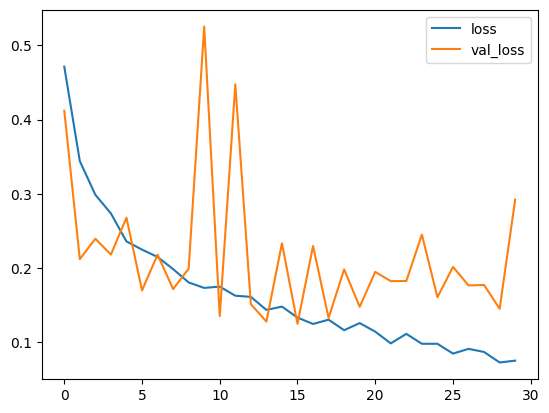

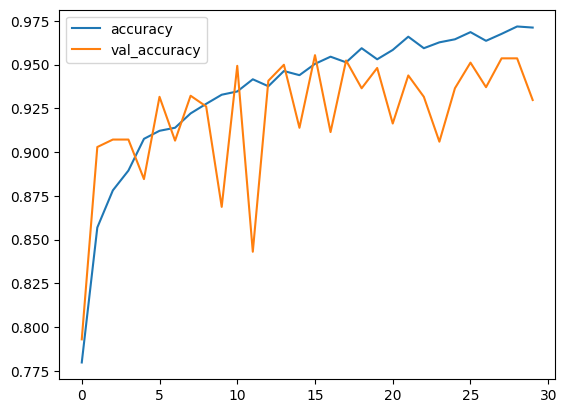

In [16]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

#### Nhận xét:
- Model đạt valid_accuracy tốt ~ 95.48%, có model_checkpoint tốt nhất đc valid_accuracy ~ 95.85%
- Muốn model được kết quả tốt hơn thì cần phát triển thêm dataset và xây dựng model phù hợp hơn

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [18]:
classifier.save(r'D:\Code\Project-ML\Image_Classification\Save_Model_h5\CNN.h5')
print('Saved')

Saved


In [19]:
classifier = load_model(r'D:\Code\Project-ML\Image_Classification\Save_Model_h5\CNN.h5')

In [21]:
train_evaluation= classifier.evaluate(training_set)
test_evaluation= classifier.evaluate(test_set)
print('Train Accuracy:', round(train_evaluation[1], 4), 
        '; Train loss:', round(train_evaluation[0], 4))
print('Test Accuracy:', round(test_evaluation[1], 4), 
        '; Test loss:', round(test_evaluation[0], 4))

52/52 [==============================] - 7s 129ms/step - loss: 0.2922 - accuracy: 0.9297
Train Accuracy: 0.9524 ; Train loss: 0.1573
Test Accuracy: 0.9297 ; Test loss: 0.2922


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [23]:
def result(test_image):
    test_image = image.img_to_array(test_image)
    # print(test_image.shape)
    test_image = test_image/255
    test_image = np.expand_dims(test_image, axis= 0)
    # print(test_image.shape)

    result = classifier.predict(test_image)
    # print(result)

    # 0 la glass, 1 la plastic, nguong sigmoid = 0.5
    if result[0][0] >= 0.5:
        prediction = 'PlasticWaste'
    else:
        prediction = 'Fish'
    return prediction

In [24]:
classifier.load_weights('model_checkpoint_CNN.h5')
test_evaluation= classifier.evaluate(test_set)
print('Test Accuracy:', round(test_evaluation[1], 4), 
        '; Test loss:', round(test_evaluation[0], 4))

52/52 [==============================] - 7s 131ms/step - loss: 0.1249 - accuracy: 0.9554
Test Accuracy: 0.9554 ; Test loss: 0.1249


In [25]:
import os 
predict_path= r'D:\Code\Project-ML\Image_Classification\Dataset\single_prediction\\'
list_image= os.listdir(predict_path)

In [26]:
df= pd.DataFrame(columns=['name_file', 'truth', 'predict'])
name_file=[]
truth=[]
predict=[]

In [27]:
for i in range(len(list_image)):
    path= predict_path + list_image[i]
    test_img= image.load_img(path, target_size=[128, 128])
    name_file.append(list_image[i])
    truth.append(list_image[i].split('_')[0])
    predict.append(result(test_img))

df['name_file']= name_file
df['truth']= truth
df['predict']= predict
df.to_csv(r'D:\Code\Project-ML\Computer_Vision\CNN\prediction_fish_and_plasticwaste.csv')

In [28]:
df

,name_file,truth,predict
0,Fish_1.jpg,Fish,Fish
1,Fish_10.jpg,Fish,Fish
2,Fish_11.jpg,Fish,Fish
3,Fish_12.jpg,Fish,Fish
4,Fish_13.jpg,Fish,Fish
...,...,...,...
95,PlasticWaste_50_DB.jpg,PlasticWaste,PlasticWaste
96,PlasticWaste_6_DB.jpg,PlasticWaste,Fish
97,PlasticWaste_7.jpg,PlasticWaste,PlasticWaste
98,PlasticWaste_8.jpg,PlasticWaste,PlasticWaste


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [30]:
confusion_matrix(df['truth'], df['predict'])

array([[50,  0],
       [ 7, 43]], dtype=int64)

In [31]:
print(classification_report(df['truth'], df['predict']))

              precision    recall  f1-score   support

        Fish       0.88      1.00      0.93        50
PlasticWaste       1.00      0.86      0.92        50

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100

